<a href="https://colab.research.google.com/github/ARVIND-36/house_price_prediction/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [5]:
from google.colab import files
f1 = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [30]:
house = pd.read_csv('kc_house_data.csv', encoding='latin-1')
print("DETAILS/n",house.head())
print(house.columns.tolist())
print("NULL VALUES :\n",house.isnull().sum())
# To avoid [didnt convert string to float] changinng the date from string to datetime
print("Before converting the date:",house['date'].head())

house['date'] = pd.to_datetime(house['date'], errors='coerce')

print("After converting the date:",house['date'].head())

DETAILS/n            id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      

<Axes: >

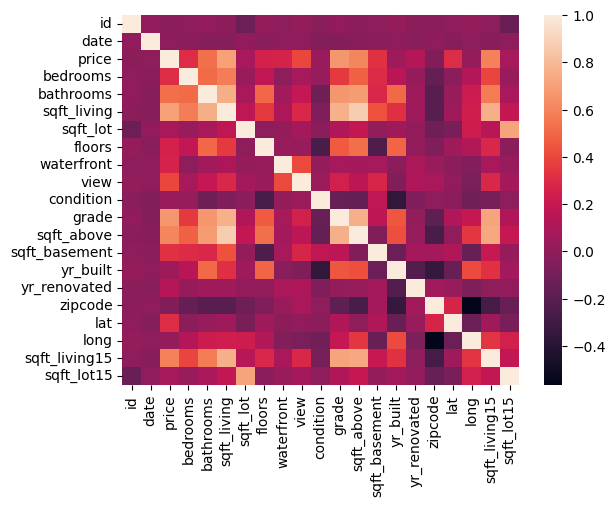

In [25]:
corr = house.corr()
sns.heatmap(corr)

In [40]:
feature_cols = 'sqft_living'
x = house[feature_cols]
#print(x.head())
y = house.price # response
print(x.head(),"\t\t\n",y.head())


0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64 		
 0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])

[[1220]
 [2490]
 [1220]
 [1010]
 [2170]]
[[350000.]
 [868500.]
 [940000.]
 [205000.]
 [359800.]]
[[2820]
 [2360]
 [ 850]
 [2960]
 [1450]]
[[615000.]
 [515000.]
 [290000.]
 [654000.]
 [175409.]]


In [49]:
linreg = LinearRegression()
#The below code doest not work because it is in 1D we have to convert to 2D
#linreg.fit(x_train, y_train)
linreg.fit(x_train, y_train)

LinearRegression()

In [53]:
# T0 Perditc the price
print(linreg.predict([[1730]]))

[[442261.0053272]]


In [55]:
mse = mean_squared_error(y_test, linreg.predict(x_test))
np.sqrt(mse)

print(linreg.score(x_test,y_test))


0.4948677851137251
